# Subpopulation investigation

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure4/'

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_83554/1673122856.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_83554/1673122856.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [ ]:
TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = 'Light')
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = 'Light')
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = 'Light')
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = 'Light')




TrhVNCCsCh = pd.read_csv(picklepath + 'TrhVNCCsCh_ele.csv').sort_values(by = 'Status')
TrhVNCACR1 = pd.read_csv(picklepath + 'TrhVNCACR1_ele.csv').sort_values(by = 'Status')
SXVNC1CsCh = pd.read_csv(picklepath + 'SXVNC1CsCh_ele.csv').sort_values(by = 'Status')
SXVNC2CsCh = pd.read_csv(picklepath + 'SXVNC2CsCh_ele.csv').sort_values(by = 'Status')
RLTG = pd.read_csv(picklepath + 'RLTG_ele.csv').sort_values(by = 'Status')
TLRG = pd.read_csv(picklepath + 'TLRG_ele.csv').sort_values(by = 'Status')
TrhBrainCsCh = pd.read_csv(picklepath + 'TrhBrainCsCh_ele.csv').sort_values(by = 'Status')


for df in [TrhCsCh, TrhACR, RLTG,TLRG, TrhBrainCsCh, TrhVNCCsCh, TrhVNCACR1, SXVNC1CsCh, SXVNC2CsCh]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000


In [ ]:
SXVNC1CsCh.Genotype


0           w1118; trh-ad; uas-csch
94                w1118; vt-gal4dbd
60          w1118; trh-ad; uas-csch
57                w1118; vt-gal4dbd
56          w1118; trh-ad; uas-csch
                   ...             
72     trh-ad; vt-gal4.dbd>uas-csch
76     trh-ad; vt-gal4.dbd>uas-csch
79     trh-ad; vt-gal4.dbd>uas-csch
84     trh-ad; vt-gal4.dbd>uas-csch
119    trh-ad; vt-gal4.dbd>uas-csch
Name: Genotype, Length: 120, dtype: object

In [ ]:
RLTG['GenoReduced'] = RLTG.Genotype.replace({'r50h05-lexa; trh-gal4>lexaop-gal80; uas-chrimson':'Trh>CsCh/R50H050>G80', 'w1118; lexaop-gal80; uas-chrimson':'LexAOp-Gal80; UAS-CsCh/w', 'w1118; r50h05-lexa; trh-gal4':'Trh-G; R50H05-L/w'}).astype('category').cat.set_categories(['Trh>CsCh/R50H050>G80', 'Trh-G; R50H05-L/w', 'LexAOp-Gal80; UAS-CsCh/w'], ordered=True)
TLRG['GenoReduced'] = TLRG.Genotype.replace({'trh-lexa; r50h05-gal4>lexaop-gal80; uas-chrimson':'Trh>G80/R50H050>CsCh', 'w1118; uas-chrimson; lexaop-gal80':'LexAOp-Gal80; UAS-CsCh/w', 'w1118; trh-lexa; r50h05-gal4':'Trh-L; R50H05-G/w'}).astype('category').cat.set_categories(['Trh>G80/R50H050>CsCh', 'Trh-L; R50H05-G/w', 'LexAOp-Gal80; UAS-CsCh/w'], ordered=True)
TrhBrainCsCh['GenoReduced'] = TrhBrainCsCh.Genotype.replace({'trh-gal4>tsh-gal80; uas-cschrimson':'Trh>Brain-CsCh', 'w1118; tsh-gal80; uas-cschrimson':'Brain-CsCh/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['Brain-CsCh/w', 'Trh/w', 'Trh>Brain-CsCh'], ordered=True)
TrhVNCCsCh['GenoReduced'] = TrhVNCCsCh.Genotype.replace({'trh-gal4>uas-vnc-cschrimson':'Trh>VNC-CsCh', 'w1118; uas-vnc-cschrimson':'VNC-CsCh/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['VNC-CsCh/w', 'Trh/w', 'Trh>VNC-CsCh'], ordered=True)
TrhVNCACR1['GenoReduced'] = TrhVNCACR1.Genotype.replace({'trh-gal4>uas-vnc-acr1':'Trh>VNC-ACR1', 'w1118; uas-vnc-acr1':'VNC-ACR1/w', 'w1118; trh-gal4':'Trh/w'}).astype('category').cat.set_categories(['VNC-ACR1/w', 'Trh/w', 'Trh>VNC-ACR1'], ordered=True)
# R50ACR['GenoReduced'] = R50ACR.Genotype.replace({'r50h05-gal4>uas-acr1':'R50H05>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; r50h05-gal4':'R50H05/w'}).astype('category').cat.set_categories(['ACR1/w', 'R50H05/w', 'R50H05>ACR1'], ordered=True)
SXVNC1CsCh['GenoReduced'] = SXVNC1CsCh.Genotype.replace({'trh-ad; vt-gal4.dbd>uas-csch':'SXVNC1>VNC-CsCh', 'w1118; trh-ad; uas-csch':'Trh-AD; CsCh/w', 'w1118; vt-gal4dbd':'VT042751-DBD/w'}).astype('category').cat.set_categories(['Trh-AD; CsCh/w', 'VT042751-DBD/w', 'SXVNC1>VNC-CsCh'], ordered=True)
SXVNC2CsCh['GenoReduced'] = SXVNC2CsCh.Genotype.replace({'sxvnc2-gal4>uas-csch':'SXVNC2>CsCh', 'w1118; uas-cschrimson':'CsCh/w', 'w1118; sxvnc2-gal4':'SXVNC2/w'}).astype('category').cat.set_categories(['CsCh/w', 'SXVNC2/w', 'SXVNC2>CsCh'], ordered=True)

RLTGpalette = {'Trh>CsCh/R50H050>G80':'orangered', 'LexAOp-Gal80; UAS-CsCh/w':'gray', 'Trh-G; R50H05-L/w':'k'}
TLRGpalette = {'Trh>G80/R50H050>CsCh':'orangered', 'LexAOp-Gal80; UAS-CsCh/w':'gray', 'Trh-L; R50H05-G/w':'k'}
TrhBrainCsChpalette = {'Trh>Brain-CsCh':'orangered', 'Brain-CsCh/w':'gray', 'Trh/w':'k'}
TrhVNCCsChpalette = {'Trh>VNC-CsCh':'orangered', 'VNC-CsCh/w':'gray', 'Trh/w':'k'}
TrhVNCACRpalette = {'Trh>VNC-ACR1':'seagreen', 'VNC-ACR1/w':'gray', 'Trh/w':'k'}
SXVNC1CsChpalette = {'SXVNC1>VNC-CsCh':'orangered', 'Trh-AD; CsCh/w':'gray', 'VT042751-DBD/w':'k'}
SXVNC2CsChpalette = {'SXVNC2>CsCh':'orangered', 'CsCh/w':'gray', 'SXVNC2/w':'k'}


trhacrpalette = {'Trh>ACR1':'seagreen', 'ACR1/w':'gray', 'Trh/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

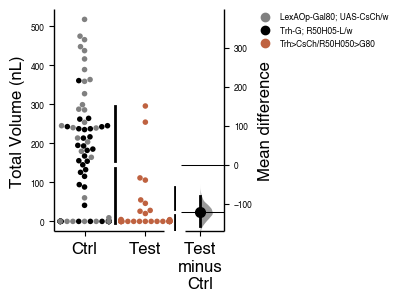

In [ ]:
RLTGV = dabest.load(RLTG, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fRLTGV = RLTGV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= RLTGpalette, 
                              fig_size=(4, 3), swarm_label='Total Volume (nL)', float_contrast=True, contrast_ylim=( -200, 50))
fRLTGV.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fRLTGV.axes[0].legend( )

# fRLTGV.axes[0].legend( frameon=False,loc='upper right', bbox_to_anchor=(0.8, .6, 0.5, 0.5), fontsize= 9, markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fRLTGV.savefig(figurepath+'RLTG_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

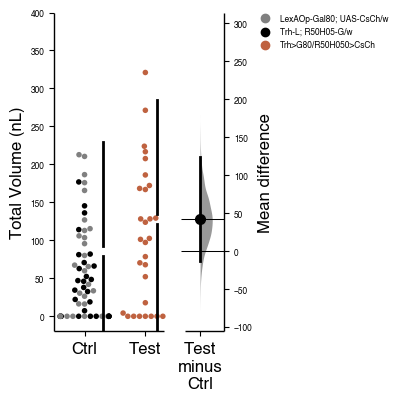

In [ ]:
TLRGV = dabest.load(TLRG, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fTLRGV = TLRGV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TLRGpalette, 
                              fig_size=(4, 4), swarm_ylim=(-20, 400), swarm_label='Total Volume (nL)', float_contrast=True, contrast_ylim=( -50, 200))
fTLRGV.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTLRGV.axes[0].legend( )

# fTLRGV.axes[0].legend( frameon=False,loc='upper right', , fontsize= 9, markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTLRGV.savefig(figurepath+'TLRG_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anacon

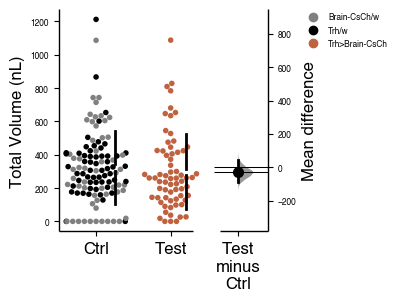

In [ ]:
TrhBrainV = dabest.load(TrhBrainCsCh, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fTrhBrainV = TrhBrainV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TrhBrainCsChpalette, 
                              fig_size=(4, 3), swarm_label='Total Volume (nL)', float_contrast=True,)
fTrhBrainV.axes[0].set_xticklabels(['Ctrl', 'Test'])

# fTrhBrainV.axes[0].legend( frameon=False,loc='upper right', bbox_to_anchor=(0.5, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTrhBrainV.savefig(figurepath+'TrhBrain_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anac

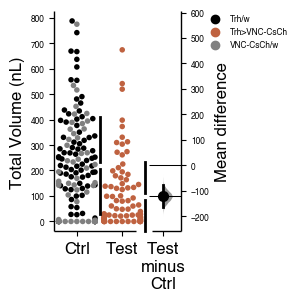

In [ ]:
TrhVNCCsChV = dabest.load(TrhVNCCsCh, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fTrhVNCCsChV = TrhVNCCsChV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TrhVNCCsChpalette, 
                              fig_size=(3, 3), swarm_label='Total Volume (nL)', float_contrast=True, contrast_ylim=( -200, 50))
fTrhVNCCsChV.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTrhVNCCsChV.savefig(figurepath+'TrhVNCCsCh_Vcontrast.svg')

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/ana

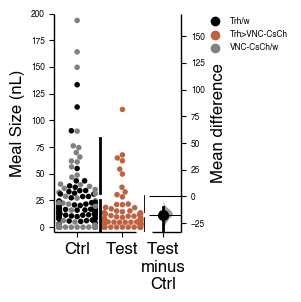

In [ ]:
TrhVNCCsChMS = dabest.load(TrhVNCCsCh, x = 'Status', y =  'Meal Size', delta2 = False, idx=['Ctrl', 'Test'])
fTrhVNCCsChMS = TrhVNCCsChMS.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TrhVNCCsChpalette, 
                              fig_size=(3, 3), swarm_label='Meal Size (nL)', float_contrast=True, swarm_ylim=( -5, 200))
fTrhVNCCsChMS.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTrhVNCCsChMS.savefig(figurepath+'TrhVNCCsCh_MScontrast.svg')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

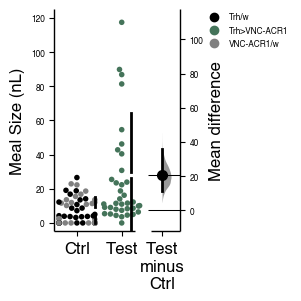

In [ ]:
TrhVNCACR1MS = dabest.load(TrhVNCACR1, x = 'Status', y =  'Meal Size', delta2 = False, idx=['Ctrl', 'Test'])
fTrhVNCACR1MS = TrhVNCACR1MS.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TrhVNCACRpalette, 
                              fig_size=(3, 3), swarm_label='Meal Size (nL)', float_contrast=True, swarm_ylim=( -5, 125))
fTrhVNCACR1MS.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTrhVNCACR1MS.savefig(figurepath+'TrhVNCACR1_MScontrast.svg')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

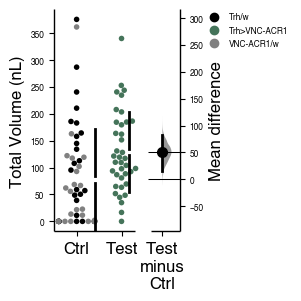

In [ ]:
TrhVNCACR1V = dabest.load(TrhVNCACR1, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fTrhVNCACR1V = TrhVNCACR1V.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= TrhVNCACRpalette, 
                              fig_size=(3, 3), swarm_label='Total Volume (nL)', float_contrast=True)
fTrhVNCACR1V.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fTrhVNCACR1V.savefig(figurepath+'TrhVNCACR1_Vcontrast.svg')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

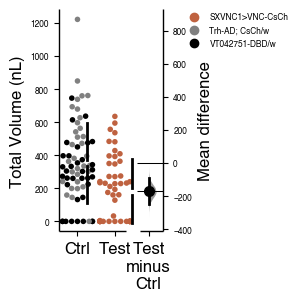

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


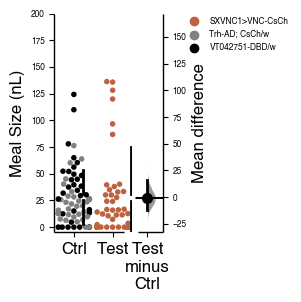

In [ ]:
SXVNC1CsChV = dabest.load(SXVNC1CsCh, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fSXVNC1CsChV = SXVNC1CsChV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= SXVNC1CsChpalette, 
                              fig_size=(3, 3), swarm_label='Total Volume (nL)', float_contrast=True, contrast_ylim=( -200, 50))
fSXVNC1CsChV.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fSXVNC1CsChV.savefig(figurepath+'SXVNC1CsCh_Vcontrast.svg')

SXVNC1CsChMS = dabest.load(SXVNC1CsCh, x = 'Status', y =  'Meal Size', delta2 = False, idx=['Ctrl', 'Test'])
fSXVNC1CsChMS = SXVNC1CsChMS.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= SXVNC1CsChpalette, 
                              fig_size=(3, 3), swarm_label='Meal Size (nL)', float_contrast=True, swarm_ylim=( -5, 200))
fSXVNC1CsChMS.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fSXVNC1CsChMS.savefig(figurepath+'SXVNC1CsCh_MScontrast.svg')



/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/an

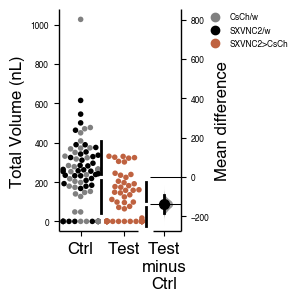

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


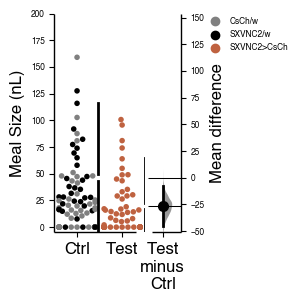

In [ ]:
SXVNC2CsChV = dabest.load(SXVNC2CsCh, x = 'Status', y =  'Volume', delta2 = False, idx=['Ctrl', 'Test'])
fSXVNC2CsChV = SXVNC2CsChV.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= SXVNC2CsChpalette, 
                              fig_size=(3, 3), swarm_label='Total Volume (nL)', float_contrast=True, contrast_ylim=( -200, 50))
fSXVNC2CsChV.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fSXVNC2CsChV.savefig(figurepath+'SXVNC2CsCh_Vcontrast.svg')

SXVNC2CsChMS = dabest.load(SXVNC2CsCh, x = 'Status', y =  'Meal Size', delta2 = False, idx=['Ctrl', 'Test'])
fSXVNC2CsChMS = SXVNC2CsChMS.mean_diff.plot(color_col = 'GenoReduced', raw_marker_size=4, es_marker_size= 7, custom_palette= SXVNC2CsChpalette, 
                              fig_size=(3, 3), swarm_label='Meal Size (nL)', float_contrast=True, swarm_ylim=( -5, 200))
fSXVNC2CsChMS.axes[0].set_xticklabels(['Ctrl', 'Test'])
# fTrhVNCCsChV.axes[0].legend( )

# fTrhVNCCsChV.axes[0].legend( frameon=False, loc='upper right', bbox_to_anchor=(0.6, .7, 0.5, 0.5), fontsize= 9,  markerscale = 1, )

# fRLTGV.axes[1].set_xticklabels(['', 'On', r'$\Delta\Delta$'])
fSXVNC2CsChMS.savefig(figurepath+'SXVNC2CsCh_MScontrast.svg')



In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'RLTG.svg').scale(0.023),
    Text("A", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'RLTG_Vcontrast.svg').scale(0.017),
    Text("B", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 1),
    Panel(SVG(figurepath + 'trhbraincsch.svg').scale(0.03),
    Text("C", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(9, 1),
    Panel(SVG(figurepath + 'TrhBrain_Vcontrast.svg').scale(0.017),
    Text("D", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(13, 1),
    Panel(SVG(figurepath + 'trhvnccsch.svg').scale(0.026),
    Text("E", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 4.8),
    Panel(SVG(figurepath + 'TrhVNCCsCh_Vcontrast.svg').scale(0.017),
    Text("F", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 4.8),
    Panel(SVG(figurepath + 'TrhVNCACR1_Vcontrast.svg').scale(0.017),
    Text("H", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 4.8),
    Panel(SVG(figurepath + 'TrhVNCACR1_MScontrast.svg').scale(0.017),
    Text("I", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(14, 4.8),
    Panel(SVG(figurepath + 'TrhVNCCsCh_MScontrast.svg').scale(0.017),
    Text("J", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7.8, 4.8),
    Panel(SVG(figurepath + 'SXVNC1.svg').scale(0.03),
    Text("K", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 9),
    Panel(SVG(figurepath + 'SXVNC1CsCh_Vcontrast.svg').scale(0.017),
    Text("L", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(2.8, 9),
    Panel(SVG(figurepath + 'SXVNC1CsCh_MScontrast.svg').scale(0.017),
    Text("M", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(5.9, 9),
    Panel(SVG(figurepath + 'SXVNC2.svg').scale(0.03),
    Text("N", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(9.2, 9),
    Panel(SVG(figurepath + 'SXVNC2CsCh_Vcontrast.svg').scale(0.017),
    Text("O", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 9),
    Panel(SVG(figurepath + 'SXVNC2CsCh_MScontrast.svg').scale(0.017),
    Text("P", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(14, 9),

    ).save(figurepath+"/Figure4.svg")



In [ ]:
## from svgutils.compose import *

Figure("24cm", "30cm", 
    Panel(SVG(figurepath + 'RLTG.svg').scale(0.023),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 1),
    Panel(SVG(figurepath + 'RLTG_Vcontrast.svg').scale(0.017),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 1),
    Panel(SVG(figurepath + 'trhbraincsch.svg').scale(0.03),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(9, 1),
    Panel(SVG(figurepath + 'TrhBrain_Vcontrast.svg').scale(0.017),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(13, 1),
    Panel(SVG(figurepath + 'trhvnccsch.svg').scale(0.026),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 4.8),
    Panel(SVG(figurepath + 'TrhVNCCsCh_Vcontrast.svg').scale(0.017),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(4.5, 4.8),
    Panel(SVG(figurepath + 'TrhVNCACR1_Vcontrast.svg').scale(0.017),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 4.8),
    Panel(SVG(figurepath + 'TrhVNCACR1_MScontrast.svg').scale(0.017),
    Text("", 0.2, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(14, 4.8),
    Panel(SVG(figurepath + 'TrhVNCCsCh_MScontrast.svg').scale(0.017),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(7.8, 4.8),
    Panel(SVG(figurepath + 'SXVNC1.svg').scale(0.03),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(1, 9),
    Panel(SVG(figurepath + 'SXVNC1CsCh_Vcontrast.svg').scale(0.017),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(2.8, 9),
    Panel(SVG(figurepath + 'SXVNC1CsCh_MScontrast.svg').scale(0.017),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(5.9, 9),
    Panel(SVG(figurepath + 'SXVNC2.svg').scale(0.03),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(9.2, 9),
    Panel(SVG(figurepath + 'SXVNC2CsCh_Vcontrast.svg').scale(0.017),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(11, 9),
    Panel(SVG(figurepath + 'SXVNC2CsCh_MScontrast.svg').scale(0.017),
    Text("", 0, -0.1, size=0.3, font = 'Helvetica', weight='bold') ).move(14, 9),

    ).save(figurepath+"/Figure4_nolabel.svg")



###### 